In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [484]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f"Dataset shape: {df.shape} ")
df.head()

Dataset shape: (7043, 21) 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [486]:
# turn TotalCharges column to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(f"Missing values in TotalCharges: {df["TotalCharges"].isnull().sum()}")

Missing values in TotalCharges: 11


In [487]:
# Fill missing values with 0
df["TotalCharges"].fillna(0, inplace=True)

print("Missing values after imputation:\n" + df.isnull().sum().to_string())

Missing values after imputation:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0


# Data Visualization

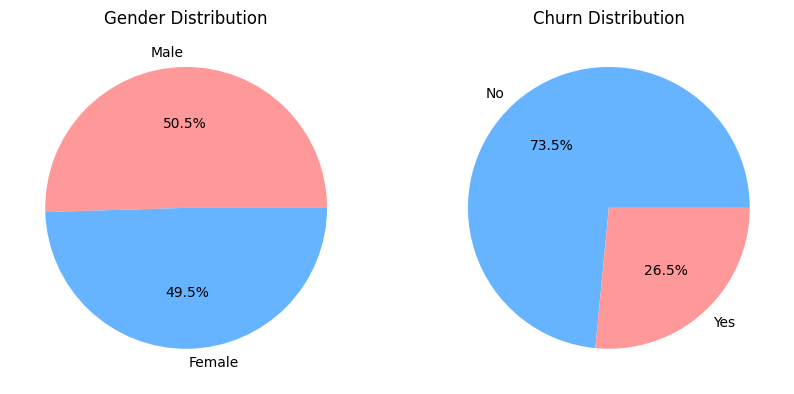

In [488]:
# pie charts for Gender and Churn distribution
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df["gender"].value_counts(), labels=df["gender"].value_counts().index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Gender Distribution")
plt.subplot(1,2,2)
plt.pie(df["Churn"].value_counts(), labels=df["Churn"].value_counts().index, autopct="%1.1f%%", colors=["#66b3ff","#ff9999"])
plt.title("Churn Distribution")
plt.show()


According to the graphs, 50.5% are Male and 49.5% are females.
Based on the data, 26.5% are churned(leaved) while 73.5% remaining. 

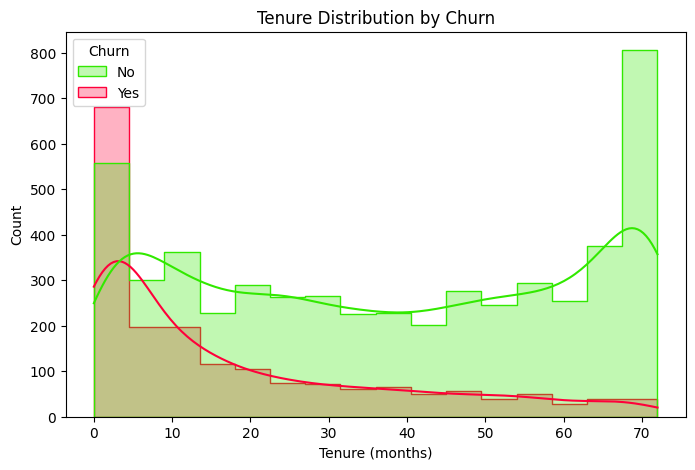

In [489]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", palette="prism", kde=True, element='step',  alpha=0.3)
plt.title("Tenure Distribution by Churn")
plt.ylabel("Count")
plt.xlabel("Tenure (months)")
plt.show()

based on Tenure discribution, new customers (~ 1-4 months) have a tends to churn, but after some time they intends to stay with the firm.

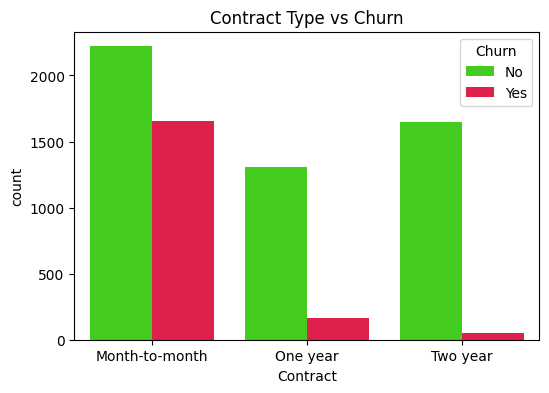

In [490]:
# Contract type vs churn
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="prism")
plt.title('Contract Type vs Churn')
plt.show()

Month-to-month (Contract) customers have much higher churn than customers on 1-year or 2-year contracts. 

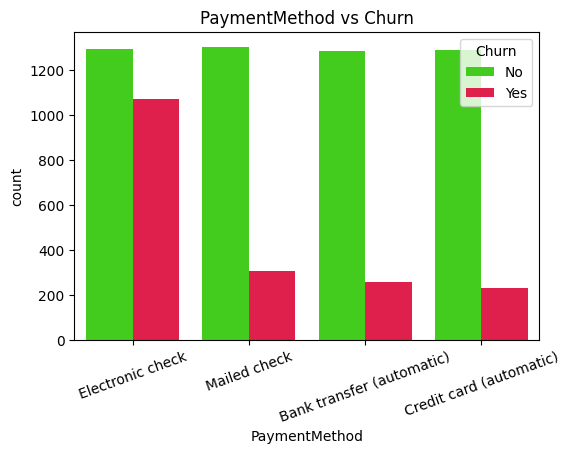

In [491]:
# PaymentMethod vs churn
plt.figure(figsize=(6,4))
sns.countplot(x="PaymentMethod", hue='Churn', data=df, palette="prism")
plt.title('PaymentMethod vs Churn')
plt.xticks(rotation = 20)
plt.show()

Customers that does payings using Electronic check usually show the highest churn rate, compared to credit card or bank transfer.

(1850, 21)


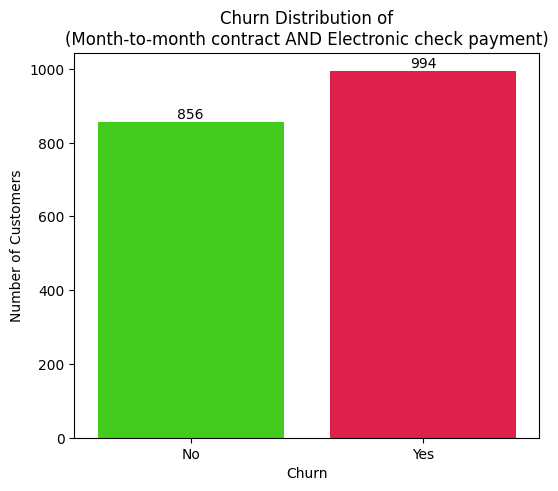

In [492]:
risk_df = df[(df["Contract"] == "Month-to-month") & (df["PaymentMethod"] == "Electronic check")]
print(risk_df.shape)

plt.figure(figsize=(6, 5))
ax = sns.countplot(data=risk_df, x="Churn", hue="Churn", palette="prism")
plt.title("Churn Distribution of\n(Month-to-month contract AND Electronic check payment)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

# show value on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position (middle of bar)
        height,                         # y position (top of bar)
        int(height),                    # text = count
        ha='center',
        va='bottom'
    )

plt.show()

As the graph says, Customers with Month-to-month (Contract) and use Electronic check as payment, can be seen ~54% chance to be churn.

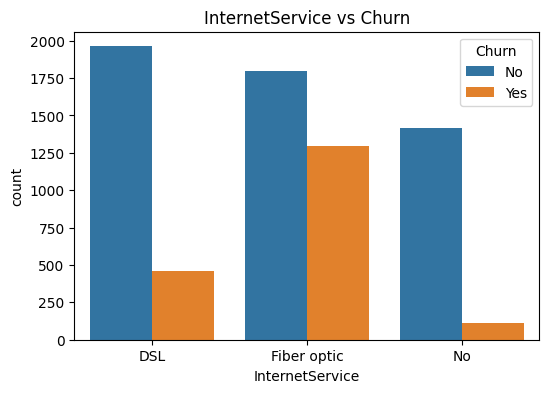

In [493]:
# PaymentMethod vs churn
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", hue='Churn', data=df)
plt.title('InternetService vs Churn')
plt.show()

Customers who have Five-optic tends to churn than other parties.

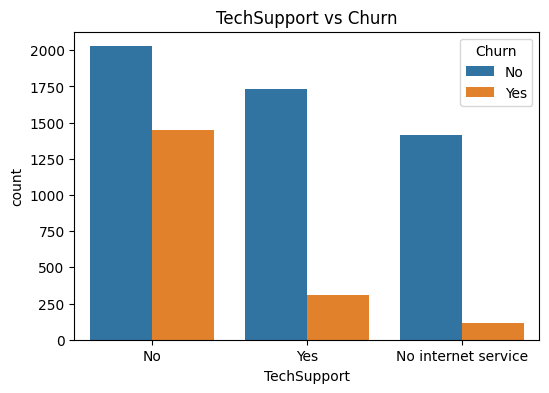

In [494]:
# PaymentMethod vs churn
plt.figure(figsize=(6,4))
sns.countplot(x="TechSupport", hue='Churn', data=df)
plt.title('TechSupport vs Churn')
plt.show()

also Customer who did't have tech supports, churns than the rest.

(2230, 21)


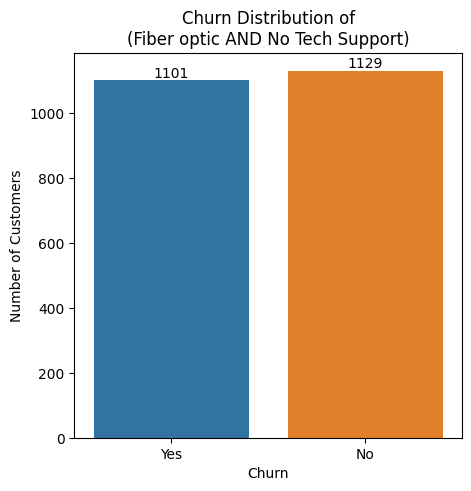

In [495]:
risk_df = df[(df["InternetService"] == "Fiber optic") & (df["TechSupport"] == "No")]
print(risk_df.shape)

plt.figure(figsize=(5, 5))
ax =sns.countplot(data=risk_df, x="Churn", hue="Churn")
plt.title("Churn Distribution of\n(Fiber optic AND No Tech Support)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

# show value on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position (middle of bar)
        height,                         # y position (top of bar)
        int(height),                    # text = count
        ha='center',
        va='bottom'
    )


plt.show()


Customers with Fiber-optic (InternetService) and No TechSupport, can be seen ~49% chance to be churn.

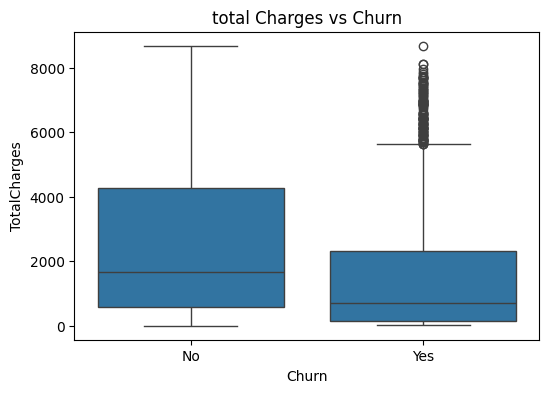

In [496]:
# Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title('total Charges vs Churn')
plt.show()

This box plot shows that while most churned customers have low TotalCharges, there are notable high-value outliers among churned customers. These outliers indicate that some long-term or high-spending customers still choose to leave, despite having paid substantial amounts over time. This suggests that churn is not limited to low-value customers and can also occur among profitable segments. The wider range of outliers in the churned group highlights heterogeneity in churn behaviour. Therefore, retention strategies should also consider high-value customers, not only those with low total charges.

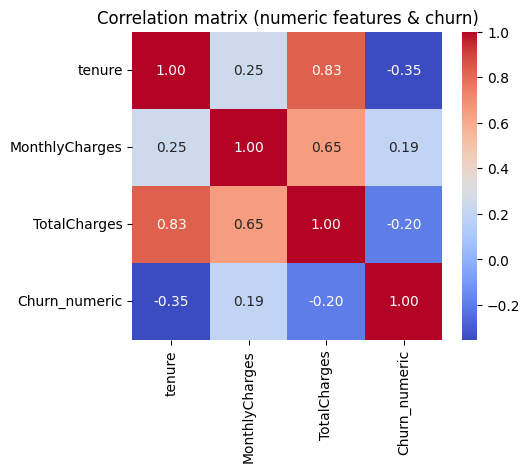

In [497]:
# Correlation heatmap
corr_df = df.copy()
corr_df['Churn_numeric'] = corr_df['Churn'].map({'Yes': 1, 'No': 0})
corr_matrix = corr_df[['tenure','MonthlyCharges','TotalCharges','Churn_numeric']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix (numeric features & churn)')
plt.show()

According to the correlation metrix, tenure vs TotalCharger has (+0.83) and monthlyCharges vs TotalCharge has (+0.65) highest positive correlation; while tenure vs churn_numeric has (-0.35) and totalCharger vs churn_binary has (-0.20) highest negative correlations.

# preprocessing

In [498]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [499]:
# turn to same structure as SeniorCitizen 
df["Partner"] = df["Partner"].map({"Yes": 1,"No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1,"No": 0})
df["PhoneService"] = df["PhoneService"].map({"Yes": 1,"No": 0})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1,"No": 0})

In [500]:
# Separate features and target variable
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [501]:
# Identify numeric and categorical columns
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in X.columns if col not in numeric_features]

In [502]:
# scale numeric features and one‑hot encode categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [503]:
# Train–test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (5634, 19)
Test set shape: (1409, 19)


# Decision Tree classifier

In [504]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [505]:
# create pipeline
pipe_DT = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])

# define hyperparameters
parameter_grid_DT = {
    'classifier__criterion': ['gini', 'entropy'],    # formulas to spits nods
    'classifier__max_depth': [None, 5, 16],          # maximum depths
    'classifier__min_samples_split': [2, 10],        # minimun data point for new spilt
    'classifier__min_samples_leaf': [1, 3]           # minimun data points for final node
}

# setup gridSearchCV
grid_DT = GridSearchCV(pipe_DT, parameter_grid_DT, cv=7, scoring='f1')

# Execute training 
grid_DT.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__criterion': ['gini', 'entropy'], 'classifier__max_depth': [None, 5, ...], 'classifier__min_samples_leaf': [1, 3], 'classifier__min_samples_split': [2, 10]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [506]:
# get best pipeline (F1 score)
best_DT = grid_DT.best_estimator_

# get prediction
y_pred_DT = best_DT.predict(X_test)

# get prediction probability score
y_proba_DT = best_DT.predict_proba(X_test)[:, 1]

In [507]:
accuracy_DT = accuracy_score(y_test, y_pred_DT)    # accuracy
auc_DT = roc_auc_score(y_test,y_proba_DT)            # AUC-ROC
classi_DT = classification_report(y_test,y_pred_DT)

print(classi_DT)
print(f"Accuracy: {accuracy_DT:.4f}")
print(f"ROC-AUC Score: {auc_DT:.4f}")

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.63      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy: 0.7970
ROC-AUC Score: 0.8312


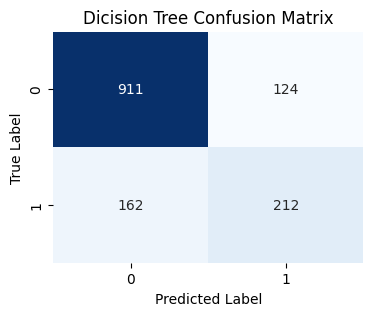

In [508]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Dicision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Neural Network (MLPClassifier)

In [509]:
from sklearn.neural_network import MLPClassifier

In [510]:
# crete pipeline
pipe_MLP = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MLPClassifier(max_iter=300, random_state=42, early_stopping=True))])

# define parameters
param_grid_MLP = {
    'classifier__hidden_layer_sizes': [(50), (100), (50,50), (50,100,50)], # structures
    'classifier__activation': ['relu', 'tanh'],                            # Activation functions
    'classifier__alpha': [0.0001, 0.001],                                  # L2 regullation terms
    'classifier__learning_rate': ['adaptive'],                             # learning rate
    'classifier__solver': ['adam']                                         # optimizer
}

# setup frid search
grid_MLP = GridSearchCV(pipe_MLP, param_grid_MLP, cv=7, scoring='f1', n_jobs=-1)

# Execute training 
grid_MLP.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__activation': ['relu', 'tanh'], 'classifier__alpha': [0.0001, 0.001], 'classifier__hidden_layer_sizes': [50, 100, ...], 'classifier__learning_rate': ['adaptive'], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [511]:
#get best pipeline (F1 score)
best_MLP = grid_MLP.best_estimator_

# get prediction
y_pred_MLP = best_MLP.predict(X_test)

# get prediction probability score
y_proba_MLP = best_MLP.predict_proba(X_test)[:, 1]

In [512]:
accuracy_MLP = accuracy_score(y_test, y_pred_MLP)       # accuracy
auc_MLP = roc_auc_score(y_test, y_proba_MLP)            # AUC-ROC
classi_MLP = classification_report(y_test,y_pred_MLP)

print(classi_MLP)
print(f"Accuracy: {accuracy_MLP:.4f}")
print(f"ROC AUC Score: {auc_MLP:.4f}")




              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Accuracy: 0.8034
ROC AUC Score: 0.8414


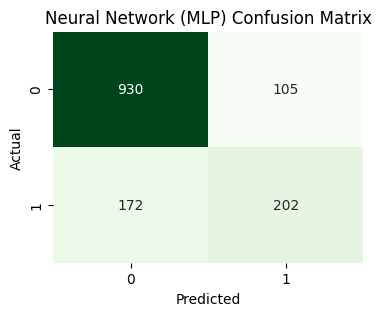

In [513]:
# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_MLP)
plt.figure(figsize=(4,3))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Neural Network (MLP) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve

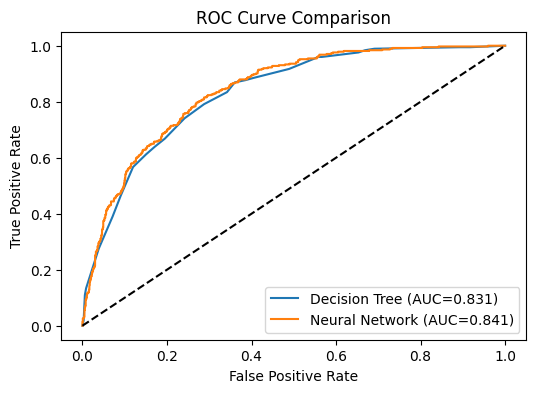

In [514]:
from sklearn.metrics import roc_curve

fpr_DT, tpr_DT, _ = roc_curve(y_test, y_proba_DT)
fpr_MLP, tpr_MLP, _ = roc_curve(y_test, y_proba_MLP)

plt.figure(figsize=(6,4))
plt.plot(fpr_DT, tpr_DT, label=f'Decision Tree (AUC={auc_DT:.3f})')
plt.plot(fpr_MLP, tpr_MLP, label=f'Neural Network (AUC={auc_MLP:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
